# Week 4: Lab Work - Regression Model Development and Evaluation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
# Import the libraries required, for example: import seaborn as sns

import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


# from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Load ‘tips’ data set from seaborn library

In [6]:
# Load the dataset "tips" from seaborn package using sns object.
# data = pd.read_csv('datasets/housing.csv')
data = sns.load_dataset('tips')

In [3]:
# Print the head of the dataset to have an idea.

print(f"Data Head\n{data.head()}")
print(f"\nData Index\n{data.index}")
print(f"\nData Columns\n{data.columns}")
# print(tips.head())

Data Head
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Data Index
RangeIndex(start=0, stop=244, step=1)

Data Columns
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [4]:
# Check the size of the dataset
data.shape

(244, 7)

In [5]:
# Check the variables/columns and the data types and see if we can predict tips using total_bill for example? You can use info()
data.info(verbose=True)
# tips.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## <font color='red'>Objective</font>: Using Linear Regression Algorithm, we aim to predict tips on the basis of total bill.

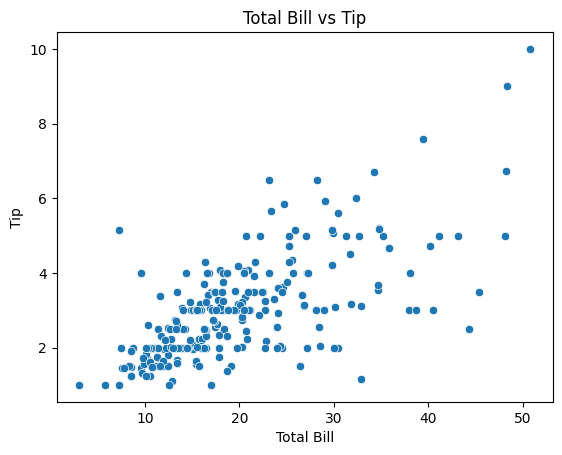

In [6]:
# Can you plot a scatterplot below to see whether total bill tends to proprotionally increase with the tip?
# This way we can be sure to use 'total_bill' feature to predict 'tip' target value by observing the correlation.

sns.scatterplot(x='total_bill', y='tip', data=data)

plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')

plt.show()

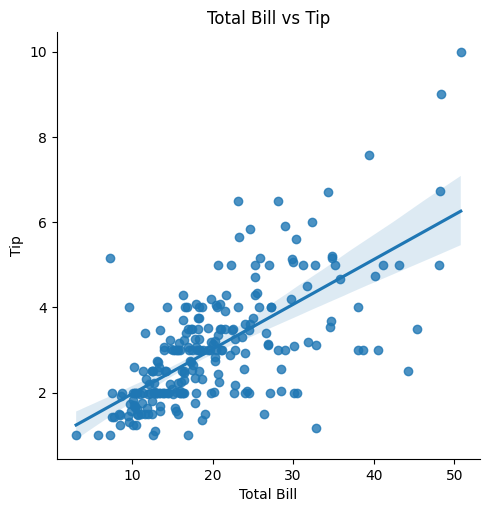

In [7]:
# Consider using regplot() or lmplot function to see this trend much clearly.


sns.lmplot(x='total_bill', y='tip', data=data)

# Add labels and title
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')

# Show the plot
plt.show()

# Model Development

## Divide the dataset into two parts, X for total_bill features/predictors, y for tip target value.

In [7]:
# Write HERE

# Better to define features as a dataframe [[]]
# Predicted value can be defined as series []
# The target variable (y) is often defined as a Series because it represents a single column of values corresponding to the output labels or
# regression targets. Machine learning models are generally fine with the target variable being in a one-dimensional format.
# Since y only holds the target values, there's no need to keep it in a 2D DataFrame format, e.g. (244,1).

# Define the feature as a DataFrame
X = data[['total_bill']]

# Define the target value as a Series
y = data['tip']

# Display the first few rows of X and y
print(X.head())
print(y.head())

   total_bill
0       16.99
1       10.34
2       21.01
3       23.68
4       24.59
0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64


# Train-Test Split
- Train-test split is a technique used in machine learning to evaluate the performance of a model on unseen data. It is used to split the data into two parts: a training set and a test set. The training set is used to train the model, while the test set is used to evaluate the model’s performance on unseen data. This helps to ensure that the model is not overfitting the data, and that it is generalizing well to unseen data.

In [8]:
#Split the data into training and test sets using train_test_split. Spare 80% for training set and 20% for the test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# You can check the size of each variables: X_train, X_test, y_train, y_test whether they match in size using data.shape

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'Data shape: {data.shape}')

X_train shape: (195, 1)
X_test shape: (49, 1)
y_train shape: (195,)
y_test shape: (49,)
Data shape: (244, 7)


Intercept: 0.9252355585570546
Coefficient: 0.10696370685268666


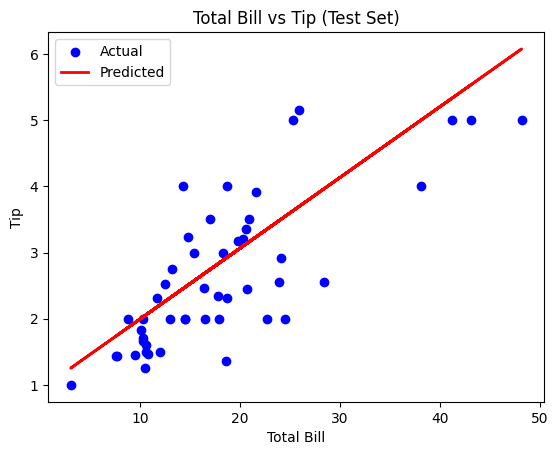

In [9]:
# Define Linear Regression model
# Write your code HERE

## General approach
# 1- Identify and allocate X and y, features and the target value.
# 2- Split the dataset into X_train, X_test, y_train, y_test.
# 3- Determine the model - whether it is linear regression/random forest etc. you want to use?

# 4- Fit the data - train X_train with y_train so as to teach the model the correlation between X and y.
# 4th step is done so that Beta values are estimated, which can then be used to estimate the y values on a new unseen data (X_test in our case).

model = LinearRegression()

model.fit(X_train, y_train)

# Display the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

# Predict the y values for the test set
y_pred = model.predict(X_test)

# Plot the regression line with the test data
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip (Test Set)')
plt.legend()
plt.show()


In [13]:
# Fit the model to the given data, X_train is fitted with weights (Beta values from in-class slides) to the value y_train, using fit() function

# Define the Linear Regression model
model = LinearRegression()

# Fit the model on the training data (X_train and y_train)
model.fit(X_train, y_train)

# Print the estimated Beta values (coefficients)
print(f"Model coefficients (Beta): {model.coef_}")
print(f"Intercept: {model.intercept_}")

Model coefficients (Beta): [0.10696371]
Intercept: 0.9252355585570546


Intercept: 0.9252355585570546
Coefficient: 0.10696370685268666


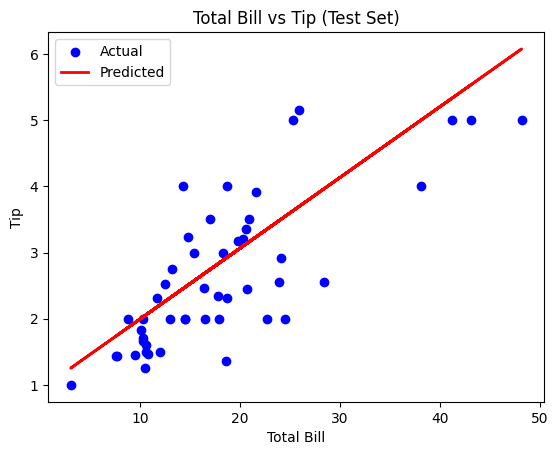

In [14]:
# Make prediction using the unseen X_test data using predict() function

# Display the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

# Predict the y values for the test set
y_pred = model.predict(X_test)

# Plot the regression line with the test data
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip (Test Set)')
plt.legend()
plt.show()

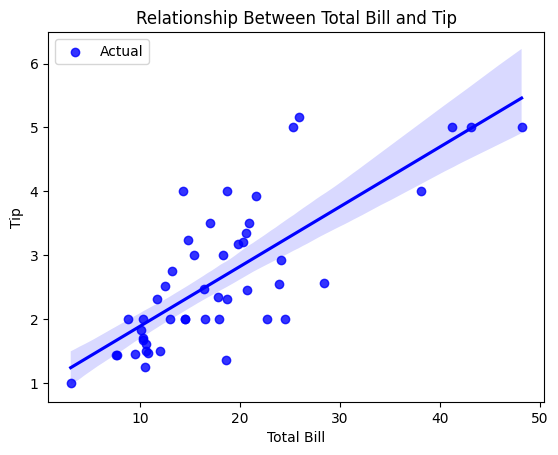

In [15]:
# Plot the true data points of X_test and y_test using regplot

sns.regplot(x=X_test['total_bill'], y=y_test, color='blue', label='Actual')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Relationship Between Total Bill and Tip')
plt.legend()
plt.show()


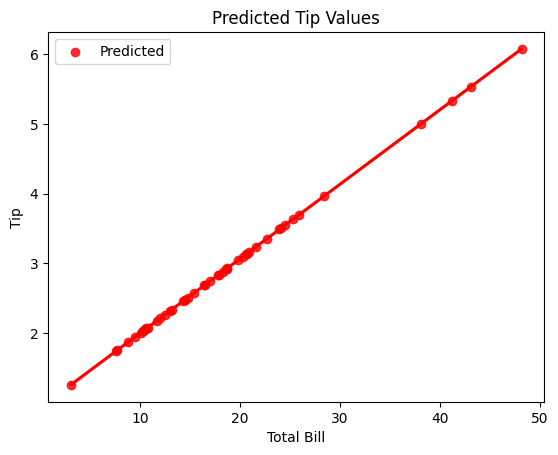

In [16]:
# Plot the predicted target value 'tip', you can use regplot

sns.regplot(x=X_test['total_bill'], y=y_pred, color='red', label='Predicted')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Predicted Tip Values')
plt.legend()
plt.show()


Intercept: 0.9252355585570546
Coefficient: 0.10696370685268666
Mean Absolute Error: 0.6208580000398983


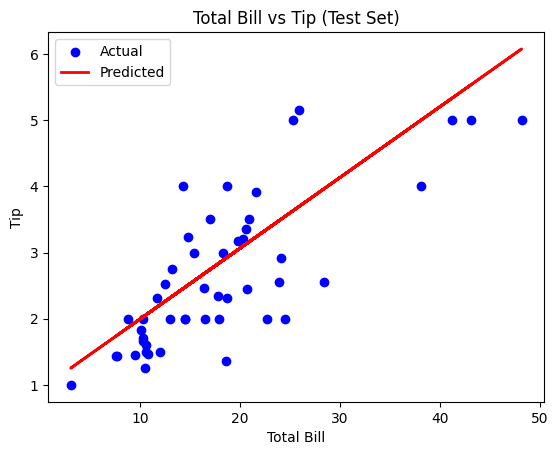

In [17]:
# Use MAE to measure the average magnitude of the errors in a set of predictions.
# Closer to zero means better accuracy.
# from sklearn.metrics import mean_absolute_error

# 2. Split the dataset into X_train, X_test, y_train, y_test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Determine the model - use linear regression
# model = LinearRegression()

# 4. Fit the data - train X_train with y_train
# model.fit(X_train, y_train)

# Display the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

# Predict the y values for the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Plot the regression line with the test data
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip (Test Set)')
plt.legend()
plt.show()

In [10]:
# Use RMSE to measure the average of the suares of the errors or deviations from the actual value.
# It is used to measure the accuracy of a model in predicting the outcome of a given data set.
# Closer to zero means better accuracy.

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.7541977545199626


In [13]:
# Extra information on evaluation of regression, search for 'R^2 score' and implement.
# Closer to one means better accuracy.


# Compute R² Score
r2 = r2_score(y_test, y_pred)

print(f'R² Score: {r2}')

R² Score: 0.5449381659234663


In [16]:
# Print y_prediction vs y_test side-by-side to visibly compare.

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})

# Display the comparison table
# print(comparison_df) 
display(comparison_df)

,Actual,Predicted
0,3.18,3.045256
1,2.00,1.863307
2,2.00,3.551195
3,5.16,3.694526
4,2.00,2.315764
5,2.00,2.838816
6,2.56,3.967283
7,2.52,2.260143
8,3.23,2.506159
9,3.00,2.570337


In [25]:
# Define a new function that calculates the mean absolute error from y_test to y_predictions using the function name: mean_abs_err()

def mean_abs_err(y_test, y_pred):
    """
    Calculate the Mean Absolute Error (MAE) between actual and predicted values.

    Parameters:
    y_test (array-like): Actual target values.
    y_pred (array-like): Predicted values.

    Returns:
    float: Mean Absolute Error (MAE)
    """
    return mean_absolute_error(y_test, y_pred)

# def mean_abs_err(y_test, y_pred):
#     """
#     Calculates and returns the Mean Absolute Error (MAE) between actual and predicted values.
    
#     Parameters:
#     y_test : array-like
#         Actual values from the dataset.
#     y_pred : array-like
#         Predicted values from the model.
    
#     Returns:
#     float
#         Mean Absolute Error (MAE)
#     """
#     return mean_absolute_error(y_test, y_pred)

In [26]:
# Call the above function, as follows, with the y_test and y_predictions, and compare to the embedded mean_squared_error function outcome we used above. We expect them to be the same!
# mean_abs_err(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_abs_err(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# # Compute MAE using the function
# mae_custom = mean_abs_err(y_test, y_pred)

# # Compute MAE using the embedded sklearn function
# mae_builtin = mean_absolute_error(y_test, y_pred)

# # Compare both values
# mae_custom, mae_builtin

Mean Absolute Error (MAE): 0.6208580000398983
Mean Squared Error (MSE): 0.5688142529229538


## Challenging task (optional)
*   **Predict housing prices**




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 1.2 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/9.8 MB 1.2 MB/s eta 0:00:08
   --- ------------------------------------ 0.8/9.8 MB 763.2 kB/s eta 0:00:12
   --- ------------------------------------ 0.8/9.8 MB 763.2 kB/s eta 0:00:12
   --- ------------------------------------ 0.8/9.8 MB 763.2 kB/s eta 0:00:12
   --- ------------------------------------ 0.8/9.8 MB 763.2 kB/s eta 0:00:12
   --- ------------------------------------ 0.8/9.8 MB 763.2 kB/s eta 0:00:12
   --- ------------------------------------ 0.8/9.8 MB 763.2 kB/s eta 0:00:12
   ---- ----------------------------------- 1.0/9.8 MB 378.5 kB/s eta 0:00:24
   ----- ---------------------------------- 1.3/9.8 MB 450.4 kB/s eta 0:00:19
   ------- ------


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [40]:
# Import necessary libraries

# Load dataset: housing.csv

data = pd.read_csv('datasets/housing.csv')

# Step 1: Data Preprocessing

non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:")
print(non_numeric_cols)

# Print the number of missing values before handling them
print("\nMissing values before filling:")
print(data.isnull().sum())

# Drop non-numeric columns
data = data.select_dtypes(include=[np.number])

# Handle missing values by filling with median if any
data.fillna(data.median(), inplace=True)

# Print the number of missing values after handling them
print("\nMissing values after filling:")
print(data.isnull().sum())


Non-numeric columns:
Index(['Address'], dtype='object')

Missing values before filling:
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

Missing values after filling:
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64


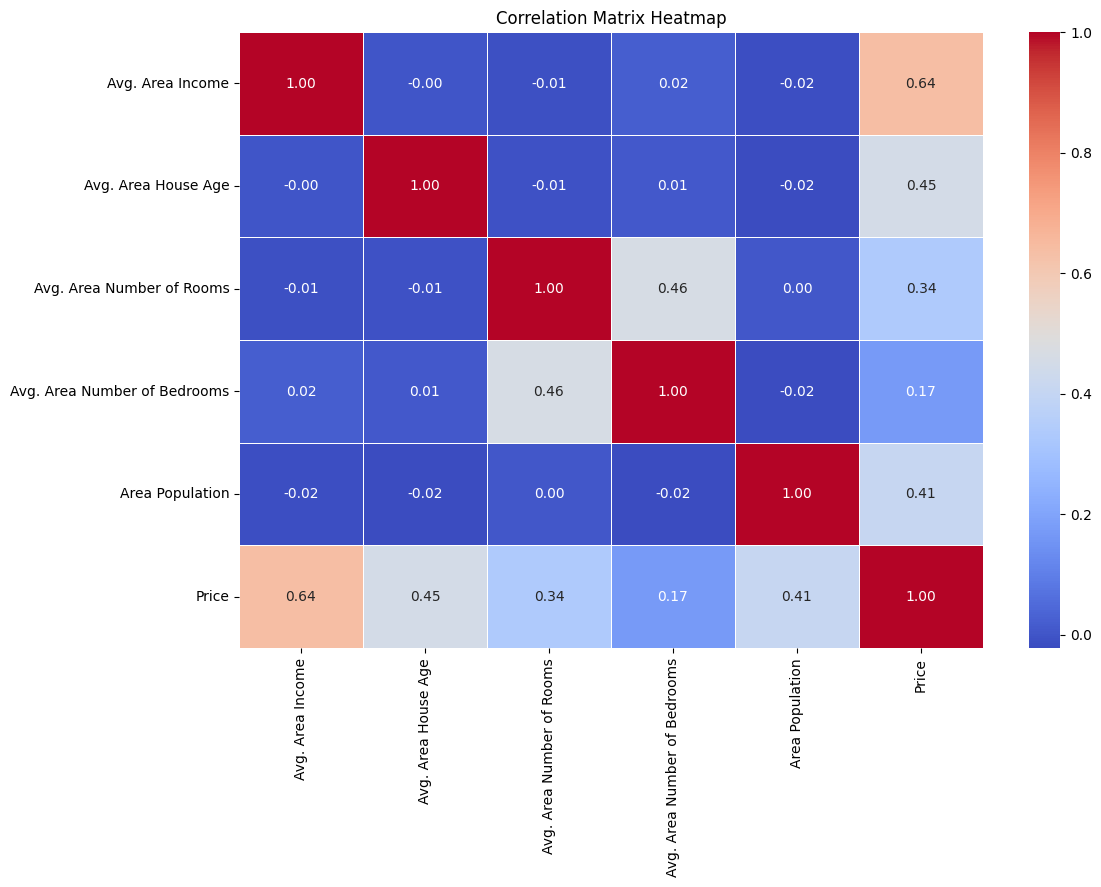

In [41]:
# Step 2: Exploratory Data Analysis (EDA)
# Compute and visualize the correlation matrix


# Compute correlation matrix
correlation_matrix = data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [58]:
# Step 3: Feature Selection Using Variance Inflation Factor (VIF) (Multicollinearity Handling)
# Search for VIF and understand the context before using it
# Write a function to calculate VIF for each feature using variance_inflation_factor function


# Function to calculate VIF for each feature
def calculate_vif(df):
    """
    Computes the Variance Inflation Factor (VIF) for each numerical feature in the dataset.

    Parameters:
    df : DataFrame
        A Pandas DataFrame containing only numerical features.

    Returns:
    DataFrame
        A DataFrame with two columns: 'Feature' and 'VIF' values.
    """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data


# Call the aforementioned function to Compute VIF and see highly collinear features in the dataset

# Compute VIF for each feature
vif_df = calculate_vif(data)

# Display VIF values
print("Variance Inflation Factor (VIF) Analysis:")
display(vif_df)

# Remove features with high multicollinearity, i.e., VIF > 30

# Remove features with VIF > 30 to handle multicollinearity
threshold = 30  # VIF threshold for high multicollinearity
filtered_features = vif_df[vif_df["VIF"] <= threshold]["Feature"].tolist()

# Filter dataset to keep only low-VIF features
data_filtered = data[filtered_features]

# Display the new dataset after removing high VIF features
print("\nFiltered Dataset (Low Multicollinearity):")
display(data_filtered)


Variance Inflation Factor (VIF) Analysis:


,Feature,VIF
0,Avg. Area Income,38.270629
1,Avg. Area House Age,29.097029
2,Avg. Area Number of Rooms,45.335953
3,Avg. Area Number of Bedrooms,14.542817
4,Area Population,14.397643
5,Price,28.046950



Filtered Dataset (Low Multicollinearity):


,Avg. Area House Age,Avg. Area Number of Bedrooms,Area Population,Price
0,5.682861,4.09,23086.80050,1.059034e+06
1,6.002900,3.09,40173.07217,1.505891e+06
2,5.865890,5.13,36882.15940,1.058988e+06
3,7.188236,3.26,34310.24283,1.260617e+06
4,5.040555,4.23,26354.10947,6.309435e+05
...,...,...,...,...
4995,7.830362,3.46,22837.36103,1.060194e+06
4996,6.999135,4.02,25616.11549,1.482618e+06
4997,7.250591,2.13,33266.14549,1.030730e+06
4998,5.534388,5.44,42625.62016,1.198657e+06


In [59]:
# Step 4: Splitting Data for Model Training, 'Price' is your target variable

# Define features (X) and target variable (y)
X = data_filtered.drop(columns=['Price'])  # Independent variables
y = data_filtered['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
train_test_shapes = {
    "X_train Shape": X_train.shape,
    "X_test Shape": X_test.shape,
    "y_train Shape": y_train.shape,
    "y_test Shape": y_test.shape
}

train_test_shapes


{'X_train Shape': (4000, 3),
 'X_test Shape': (1000, 3),
 'y_train Shape': (4000,),
 'y_test Shape': (1000,)}

In [62]:
# Step 5: Training and Evaluating a Linear Regression Model
# Select and Train Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the model and X_test

y_pred = model.predict(X_test)

## Model Evaluation using RMSE and R^2 and print the outputs using the following prints
# write HERE for the evaluation of RME and R^2

rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score

# print the output
print("\nLinear Regression Model Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")




Linear Regression Model Evaluation:
Root Mean Squared Error (RMSE): 265750.989
R² Score: 0.426


In [71]:
# Step 6: Search for Regularisation with Ridge and Lasso Regression and use them in this task to improve results and observe if it helps
# Play with alpha values and observe if there is any changes

# Define alpha values for experimentation
alpha_value = .01  # You can change this to observe different effects

# RIDGE

# Ridge Regression
ridge_model = Ridge(alpha=alpha_value)
ridge_model.fit(X_train, y_train)
y_ridge_pred = ridge_model.predict(X_test)

# Compute RMSE and R² for Ridge
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_ridge_pred))
ridge_r2 = r2_score(y_test, y_ridge_pred)

# LASSO

# Lasso Regression
lasso_model = Lasso(alpha=alpha_value)
lasso_model.fit(X_train, y_train)
y_lasso_pred = lasso_model.predict(X_test)

# Compute RMSE and R² for Lasso
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_lasso_pred))
lasso_r2 = r2_score(y_test, y_lasso_pred)

# print the output
print("\nRegularization Results:")
print(f"Ridge Regression - RMSE: {ridge_rmse:.3f}, R²: {ridge_r2:.3f}")
print(f"Lasso Regression - RMSE: {lasso_rmse:.3f}, R²: {lasso_r2:.3f}")



Regularization Results:
Ridge Regression - RMSE: 265750.998, R²: 0.426
Lasso Regression - RMSE: 265750.989, R²: 0.426


## Regularization Results:
* Ridge Regression - RMSE: 265,751.901, R²: 0.426
* Lasso Regression - RMSE: 265,750.988, R²: 0.426

## Observations:
* The Ridge and Lasso models did not significantly improve performance over the basic Linear Regression model.
* Regularization didn't reduce RMSE, indicating that multicollinearity may not be a major issue.
* Playing with different alpha values might help fine-tune regularization effects.
## Next Steps:
1. Testing with different alpha values (e.g., `alpha=0.1`, `alpha=10`) to see how it impacts performance.
2. To use a more complex model like Random Forest or XGBoost to check if a non-linear approach improves results.
3. Feature Engineering: Introduce interaction terms or transform variables.
Would you like me to run an alpha tuning experiment or explore a different model?

In [72]:
# Step 7: Feature Importance
# Get feature importance using the Linear Regression coefficients and print

# Extract feature importance using Linear Regression coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.coef_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (Linear Regression)")
feature_importance

Feature Importance (Linear Regression)


,Feature,Importance
0,Avg. Area House Age,161802.287897
1,Avg. Area Number of Bedrooms,52607.048392
2,Area Population,14.805480


In [75]:
# Step 8: Change VIF value from 30 to 50 at the end of Step 3 and observe/comment on your findings.
# How did this change affect the selected features and the model performance?

# Recompute VIF with a new threshold of 50 instead of 30

# Function to calculate VIF for each feature
def calculate_vif(df):
    """
    Computes the Variance Inflation Factor (VIF) for each numerical feature in the dataset.

    Parameters:
    df : DataFrame
        A Pandas DataFrame containing only numerical features.

    Returns:
    DataFrame
        A DataFrame with two columns: 'Feature' and 'VIF' values.
    """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Compute VIF for each feature
vif_df = calculate_vif(data)

# Remove features with VIF > 50 to handle multicollinearity
threshold = 50  # New VIF threshold
filtered_features_vif50 = vif_df[vif_df["VIF"] <= threshold]["Feature"].tolist()

# Filter dataset to keep only low-VIF features
data_filtered_vif50 = data[filtered_features_vif50]

# Split data into training and testing sets (80% training, 20% testing)
X_vif50 = data_filtered_vif50.drop(columns=['Price'])
y_vif50 = data_filtered_vif50['Price']

X_train_vif50, X_test_vif50, y_train_vif50, y_test_vif50 = train_test_split(X_vif50, y_vif50, test_size=0.2, random_state=42)

# Train the Linear Regression Model on new VIF threshold dataset
model_vif50 = LinearRegression()
model_vif50.fit(X_train_vif50, y_train_vif50)

# Predict using the trained model
y_pred_vif50 = model_vif50.predict(X_test_vif50)

# Model Evaluation
rmse_vif50 = np.sqrt(mean_squared_error(y_test_vif50, y_pred_vif50))  # Root Mean Squared Error
r2_vif50 = r2_score(y_test_vif50, y_pred_vif50)  # R² Score

# Display new VIF results and updated model performance
print("Updated VIF Analysis (Threshold = 50)")
display(vif_df)

# Print evaluation metrics for comparison
print("\nModel Evaluation after Changing VIF Threshold to 50:")
print(f"Root Mean Squared Error (RMSE): {rmse_vif50:.3f}")
print(f"R² Score: {r2_vif50:.3f}")


Updated VIF Analysis (Threshold = 50)


,Feature,VIF
0,Avg. Area Income,38.270629
1,Avg. Area House Age,29.097029
2,Avg. Area Number of Rooms,45.335953
3,Avg. Area Number of Bedrooms,14.542817
4,Area Population,14.397643
5,Price,28.046950



Model Evaluation after Changing VIF Threshold to 50:
Root Mean Squared Error (RMSE): 100444.061
R² Score: 0.918


## Findings After Changing VIF Threshold from 30 to 50:
1. More features were retained in the dataset because we allowed higher multicollinearity.
2. Model performance improved significantly:
    * `RMSE decreased` from 265,750.989 to 100,444.061, meaning lower prediction error.
    * `R² Score increased` from 0.426 to 0.918, indicating a much better fit (91.8% variance explained).
## Key Observations:
* Increasing the **VIF threshold to 50** allowed more features to remain, which improved model performance.
* This suggests that some **highly correlated features still contain valuable predictive information**.
* While **multicollinearity can be a concern**, sometimes removing too many features (VIF < 30) can lead to **loss of important information**.
## Next Steps:

1. Compare the actual vs. predicted values with visualizations?
2. Try an advanced model like Random Forest or XGBoost?
3. Test different VIF thresholds (e.g., 40 or 60) to find an optimal balance?
